## Chapter 4 : A Simple Way to Incorporate Additional Attributes in Your Model

In this chapter, we’ll look at how to
include additional attributes into a deep neural network time
series forecasting model.

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import plot, legend, subplot

In [52]:
loc = "COE.csv"
temp = pd.read_csv(loc)

In [53]:
temp.head()

,Unnamed: 0,DATE,COE$,COE$_1,#Bids,Quota,Open?
0,0,1990-08-01 00:00:00,7400.0,7750.0,656,472,0
1,1,1990-09-01 00:00:00,11100.0,7400.0,1462,468,0
2,2,1990-10-01 00:00:00,5002.0,11100.0,633,472,0
3,3,1990-11-01 00:00:00,3170.0,5002.0,952,511,0
4,4,1990-12-01 00:00:00,3410.0,3170.0,919,471,0


In [54]:
# drop Unnamed:0 and Date colunms
data = temp.drop(temp.columns[[0,1]], axis = 1)

- **COE$_1** is the one month lagged COE price
- **#Bids** is the number of resident bids for a COE
- **Quota** records the available certificates
- **Open?** refers to whether an open-bid or closed-bid format was used.

In [55]:
data.head()

,COE$,COE$_1,#Bids,Quota,Open?
0,7400.0,7750.0,656,472,0
1,11100.0,7400.0,1462,468,0
2,5002.0,11100.0,633,472,0
3,3170.0,5002.0,952,511,0
4,3410.0,3170.0,919,471,0


In [56]:
# attributes : COE$_1, #Bids , Quota
x =  data.drop(data.columns[[0,4]], axis = 1)
# normalize data applying Log
x= x.apply(np.log)
# Add Open feature to the feature group
x = pd.concat([x, data['Open?']], axis = 1)
# target
y = data['COE$']

In [57]:
x.head()

,COE$_1,#Bids,Quota,Open?
0,8.955448,6.486161,6.156979,0
1,8.909235,7.287561,6.148468,0
2,9.314700,6.450470,6.156979,0
3,8.517593,6.858565,6.236370,0
4,8.061487,6.823286,6.154858,0


In [58]:
x.tail()

,COE$_1,#Bids,Quota,Open?
260,9.441849,7.660114,7.215240,1
261,9.557894,7.591357,7.160069,1
262,9.581973,7.596392,7.156956,1
263,9.593492,7.443078,7.162397,1
264,9.510371,7.529943,7.173192,1


- Scaling Attributes and Target

Attribues: The attributes are scaled to lie in the 0 to 1 range. Notice that
x is reshaped by number of attributes into a numpy ndarray.
Hence the value “4” refers to the number of attributes.
A similar method is used to scale the target variable:

In [59]:
from sklearn import preprocessing

scaler_x = preprocessing.MinMaxScaler(feature_range=(0, 1))
x = np.array(x).reshape((len(x),4))
x = scaler_x.fit_transform(x)

In [60]:
scaler_y = preprocessing.MinMaxScaler(feature_range=(0, 1))
y = np.array(y).reshape((len(y),1))
y = np.log(y)
y = scaler_y.fit_transform(y)

In [61]:
y = y.tolist()
x = x.tolist()

In [62]:
y

[[0.4303045967851977],
 [0.517389731367927],
 [0.3461883307855813],
 [0.248226575512972],
 [0.26390125195486913],
 [0.19791560919336115],
 [0.0],
 [0.10641795413156219],
 [0.38746915129381265],
 [0.4726324782037754],
 [0.5187591638906255],
 [0.5406217455746296],
 [0.5426955792176786],
 [0.5380712770629741],
 [0.5723511938012302],
 [0.6056070415965842],
 [0.6221717741929507],
 [0.6224566891614745],
 [0.6281116969342475],
 [0.6469192301556894],
 [0.6917920679454206],
 [0.7440420483719794],
 [0.6818406598784101],
 [0.68316822836358],
 [0.6922897368748402],
 [0.7003142659286314],
 [0.7081771394537066],
 [0.6728366552904437],
 [0.6440416919707317],
 [0.5972602576934329],
 [0.6044748659506565],
 [0.6721788343506578],
 [0.7193131884550719],
 [0.7059046699723506],
 [0.7123235383534763],
 [0.7223597412226945],
 [0.7334956119487595],
 [0.7511436825917552],
 [0.7800024617721915],
 [0.8310193895426881],
 [0.8929891458512607],
 [0.9002641815292487],
 [0.8508813777585023],
 [0.8527409423526733],
 [0

## STEP By Step Explanatoin Neural Network.
- Step 1:- **Initialization of the network**: The initial
values of the weights need to be determined. A neural
network is generally initialized with random weights.
- Step 2:- **Feed Forward**: Information is passed forward
through the network from input to hidden and
output layer via node activation functions and weights.
The activation function is (usually) a sigmoidal (i.e.,
bounded above and below, but differentiable) function
of a weighted sum of the nodes inputs.
- Step 3:- **Error assessment**: Assess whether the error
is sufficiently small to satisfy requirements or whether the
number of iterations has reached a predetermined limit.
If either condition is met, then the training ends. Otherwise,
the iterative learning process continues.
- Step 4:- **Propagate**: The error at the output layer is
used to re-modify the weights. The algorithm propagates
the error backwards through the network and computes
the gradient of the change in error with respect to changes
in the weight values.
- Step 5:- **Adjust**: Make adjustments to the weights using
the gradients of change with the goal of reducing the
error. The weights and biases of each neuron are adjusted
by a factor based on the derivative of the activation function,
the differences between the network output and the
actual target outcome and the neuron outputs. Through
this process the network “learns”.

## Stochastic Gradient Descent

In traditional gradient descent, you use the entire dataset to
compute the gradient at each iteration. For large datasets, this
leads to redundant computations because gradients for very
similar examples are recomputed before each parameter update.
Stochastic Gradient Descent (SGD) is an approximation of
the true gradient. At each iteration, it randomly selects a single
example to update the parameters and moves in the direction of
the gradient with respect to that example. It therefore follows
a noisy gradient path to the minimum. Due in part to the lack
of redundancy, it often converges to a solution much faster than
traditional gradient descent.

One rather nice theoretical property of stochastic gradient
descent is that it is guaranteed to find the global minimum if the
loss function is convex. Provided the learning rate is decreased
slowly during training, SGD has the same convergence behavior
as traditional gradient descent.

In [63]:
from pyneurgen.neuralnet import NeuralNet

In [64]:
import random
random.seed(2016)

fit1 = NeuralNet()
#The model contains 4 input attributes, 2 hidden layers, and 1 output layer. 
#The first hidden layer contains 7 nodes, and the second hidden layer has 3 nodes.
fit1.init_layers(4, [7,3], 1)
fit1.randomize_network()

## Learning Rate

If the **learning rate is too high** the network **may miss the global minimum and not learn very well** or even at all. Setting the learning rate involves an iterative tuning procedure in which we manually set the highest
possible value.

A **high learning rate** can cause the system to **diverge in terms
of the objective function**. Choosing this **rate too low** results
in **slow learning**. Let’s set the learning rate to a relatively low
level of 0.05 and set up the training and test sets to be used by
the model:

In [65]:
fit1.set_learnrate(0.05)
fit1.set_all_inputs(x)
fit1.set_all_targets(y)
length = len(x)
# We use 95% of the observations for training the model, 
# with the remainder used for the test set.
learn_end_point = int(length * 0.95)
fit1.set_learn_range(0, learn_end_point)
fit1.set_test_range(learn_end_point + 1, length - 1)

# specify activation functions for each layer
fit1.layers[1].set_activation_type('tanh')
fit1.layers[2].set_activation_type('tanh')

# run model
model_run = fit1.learn(epochs = 200, show_epoch_results = True, random_testing = False)

epoch: 0 MSE: 0.0037577884948586837
epoch: 1 MSE: 0.004818154019342494
epoch: 2 MSE: 0.004190006217811107
epoch: 3 MSE: 0.003778444600557104
epoch: 4 MSE: 0.0034918430780442144
epoch: 5 MSE: 0.003283948279758615
epoch: 6 MSE: 0.003127923101411733
epoch: 7 MSE: 0.003007115333355074
epoch: 8 MSE: 0.002910804580296927
epoch: 9 MSE: 0.002831894250121807
epoch: 10 MSE: 0.0027655638617463756
epoch: 11 MSE: 0.002708455428563178
epoch: 12 MSE: 0.0026581712498257378
epoch: 13 MSE: 0.002612957521436694
epoch: 14 MSE: 0.0025715008786284773
epoch: 15 MSE: 0.0025327948771562674
epoch: 16 MSE: 0.002496050667160746
epoch: 17 MSE: 0.0024606361929589184
epoch: 18 MSE: 0.0024260342273195066
epoch: 19 MSE: 0.002391813150167053
epoch: 20 MSE: 0.002357606591200562
epoch: 21 MSE: 0.002323099435331045
epoch: 22 MSE: 0.0022880185630863286
epoch: 23 MSE: 0.0022521272531276326
epoch: 24 MSE: 0.002215222519778999
epoch: 25 MSE: 0.0021771348578114966
epoch: 26 MSE: 0.0021377299559927096
epoch: 27 MSE: 0.002096911

Text(0.5, 1.0, 'Mean Squared Error by Epoch')

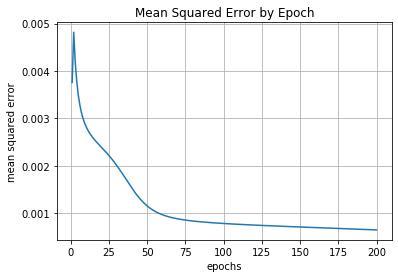

In [66]:
plt.plot(range(1, len(fit1.accum_mse) + 1, 1), fit1.accum_mse)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.grid(True)
plt.title("Mean Squared Error by Epoch")

In [67]:
# test set performance is obtained using the test() function:
mse = fit1.test()
print( "test set MSE = ", np.round(mse, 6))

test set MSE =  0.000107


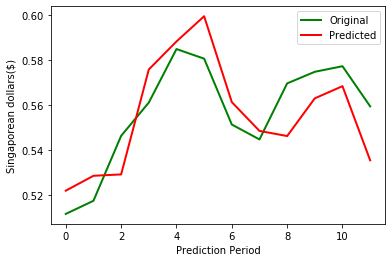

In [76]:
x_values = np.arange(12)
all_targets1 = [item[0][0] for item in fit1.test_targets_activations]
allactuals = [item[1][0] for item in fit1.test_targets_activations]

plt.plot(x_values, all_targets1, 'g-', linewidth=2, markersize=12)
plt.plot(x_values,allactuals, 'r-', linewidth=2, markersize=12)
plt.xlabel('Prediction Period')
plt.ylabel('Singaporean dollars($)')
plt.legend(('Original', 'Predicted'),loc='upper right')